# Preparing Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
directory = '/content/drive/MyDrive/Data Projects/Data Generation/Files'
%tensorflow_version 2.x

!wget https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
!pip install -r requirements.txt
!pip install tabgan

from sklearn.model_selection import train_test_split
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from tabgan.sampler import OriginalGenerator, GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Data

In [145]:
#Loading in origin dataset into dataframe
df = pd.read_csv(f'{directory}/EHR_Data.csv')

In [146]:
df2 = df.copy()

In [147]:
df2['Next_Treatment_Type'].replace(0, 'Outpatient', inplace=True)
df2['Next_Treatment_Type'].replace(1, 'Inpatient', inplace=True)
df2['Sex'].replace(0, 'Male', inplace=True)
df2['Sex'].replace(1, 'Female', inplace=True)

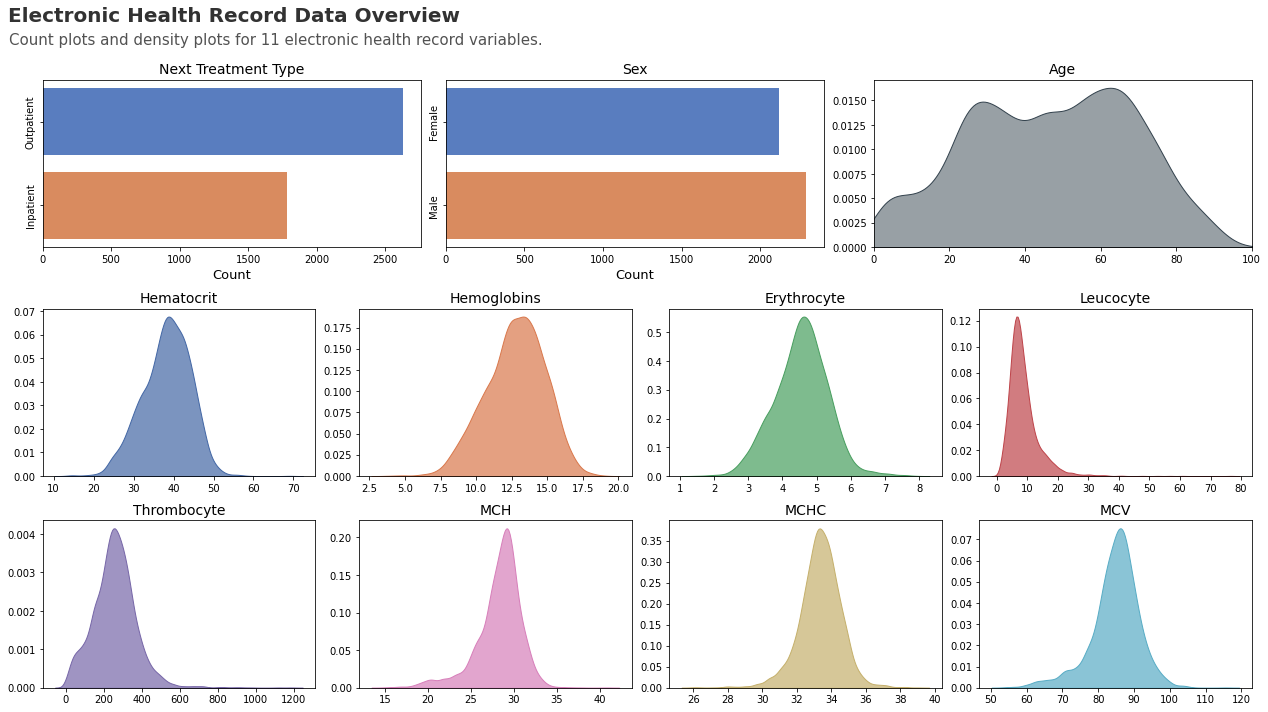

In [148]:
#Figure initialization
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(3, 12)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059, 'Electronic Health Record Data Overview', fontfamily='sans-serif',fontsize=20, fontweight='bold',color='#323232')
plt.figtext(0.004, 1.024, 'Count plots and density plots for 11 electronic health record variables.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[1, 0:3])
plt.title('Hematocrit', size = 14, fontname = 'sans-serif')
sns.kdeplot(df2['Hematocrit'], color = '#4367a5', shade = True, alpha = 0.7)
ax1.set_ylabel('', size = 14, fontname = 'sans-serif')
ax1.set_xlabel('')

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1, 3:6])
plt.title('Hemoglobins', size = 14, fontname = 'sans-serif')
sns.kdeplot(df2['Hemoglobins'], color = '#d9784c', shade = True, alpha = 0.7)
ax2.set_ylabel('', size = 14, fontname = 'sans-serif')
ax2.set_xlabel('')

#Plot 3 specifications
ax3 = ax.add_subplot(gs[1, 6:9])
plt.title('Erythrocyte', size = 14, fontname = 'sans-serif')
sns.kdeplot(df2['Erythrocyte'], color = '#489e5f', shade = True, alpha = 0.7)
ax3.set_ylabel('', size = 14, fontname = 'sans-serif')
ax3.set_xlabel('')

#Plot 4 specifications
ax4 = ax.add_subplot(gs[1, 9:12])
plt.title('Leucocyte', size = 14, fontname = 'sans-serif')
sns.kdeplot(df2['Leucocyte'], color = '#be444a', shade = True, alpha = 0.7)
ax4.set_ylabel('', size = 14, fontname = 'sans-serif')
ax4.set_xlabel('')

#Plot 5 specifications
ax5 = ax.add_subplot(gs[2, 0:3])
plt.title('Thrombocyte', size = 14, fontname = 'sans-serif')
sns.kdeplot(df2['Thrombocyte'], color = '#7767a8', shade = True, alpha = 0.7)
ax5.set_ylabel('', size = 14, fontname = 'sans-serif')
ax5.set_xlabel('')

#Plot 6 specifications
ax6 = ax.add_subplot(gs[2, 3:6])
plt.title('MCH', size = 14, fontname = 'sans-serif')
sns.kdeplot(df2['MCH'], color = '#d77fba', shade = True, alpha = 0.7)
ax6.set_ylabel('', size = 14, fontname = 'sans-serif')
ax6.set_xlabel('')

#Plot 7 specifications
ax7 = ax.add_subplot(gs[2, 6:9])
plt.title('MCHC', size = 14, fontname = 'sans-serif')
sns.kdeplot(df2['MCHC'], color = '#c5b06c', shade = True, alpha = 0.7)
ax7.set_ylabel('', size = 14, fontname = 'sans-serif')
ax7.set_xlabel('')

#Plot 8 specifications
ax8 = ax.add_subplot(gs[2, 9:12])
plt.title('MCV', size = 14, fontname = 'sans-serif')
sns.kdeplot(df2['MCV'], color = '#58acc5', shade = True, alpha = 0.7)
ax8.set_ylabel('', size = 14, fontname = 'sans-serif')
ax8.set_xlabel('')

#Plot 9 specifications
ax9 = ax.add_subplot(gs[0, :4])
plt.title('Next Treatment Type', size = 14, fontname = 'sans-serif')
sns.countplot(y="Next_Treatment_Type", data=df2, palette='muted')
ax9.set_xlabel('Count', size = 13, fontname = 'sans-serif')
ax9.set_ylabel('')
plt.yticks(rotation = 90, va="center")

#Plot 10 specifications
ax10 = ax.add_subplot(gs[0, 4:8])
plt.title('Sex', size = 14, fontname = 'sans-serif')
sns.countplot(y="Sex", data=df2, palette='muted')
ax10.set_xlabel('Count', size = 13, fontname = 'sans-serif')
ax10.set_ylabel('')
plt.yticks(rotation = 90, va="center")

#Plot 11 specifications
ax11 = ax.add_subplot(gs[0, 8:12])
plt.title('Age', size = 14, fontname = 'sans-serif')
sns.kdeplot(df2['Age'], color = '#33424d', shade = True, alpha = 0.5)
ax11.set_xlabel('', size = 13, fontname = 'sans-serif')
ax11.set_ylabel('')
plt.xlim(0,100)

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Data Overview.png' , bbox_inches="tight", dpi=600)

##Splitting Data


In [149]:
# Split Into Train & Test Sets
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(df.drop('Next_Treatment_Type', axis=1), df['Next_Treatment_Type'], test_size=0.20, random_state=8)

In [150]:
# Create dataframe versions for GAN
y_train_df = pd.DataFrame(y_train_df).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test_df).reset_index(drop=True)
x_test_df = x_test_df.reset_index(drop=True)
x_train_df = x_train_df.reset_index(drop=True)

# Real Data Prediction Models

In [151]:
#Fitting Logistic Regression Classification Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_df, y_train_df.values.ravel())
pred = logreg.predict(x_test_df)
LR_Pre = round(accuracy_score(y_test_df, pred),3)

In [ ]:
#Fitting Random Forest Classification Model
forest = RandomForestClassifier(random_state=8)
forest.fit(x_train_df, y_train_df)
pred = forest.predict(x_test_df)
RF_Pre = round(accuracy_score(y_test_df, pred),3)

In [153]:
#Fitting Decision Tree Classification Model
dectree = DecisionTreeClassifier()
dectree.fit(x_train_df, y_train_df)
pred = dectree.predict(x_test_df)
DT_Pre = round(accuracy_score(y_test_df, pred),3)

In [ ]:
#Fitting Gradient Boosting Classification Model
gradboo = GradientBoostingClassifier()
gradboo.fit(x_train_df, y_train_df)
pred = gradboo.predict(x_test_df)
GB_Pre = round(accuracy_score(y_test_df, pred),3)

In [ ]:
#Fitting Neural Network Classification Model
neural = MLPClassifier()
neural.fit(x_train_df, y_train_df)
pred = neural.predict(x_test_df)
NN_Pre = round(accuracy_score(y_test_df, pred),3)

#Generate New Data

In [156]:
gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=['Sex'],
           bot_filter_quantile=0.0001, top_filter_quantile=0.9999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.02, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=1, only_generated_data=False,
           gan_params = {"batch_size": 500, "patience": 25, "epochs" : 500,}).generate_data_pipe(x_train_df, y_train_df,
                                          x_test_df, deep_copy=True, only_adversarial=False, use_adversarial=True, only_generated_data=True)



Fitting CTGAN transformers for each column:   0%|          | 0/11 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

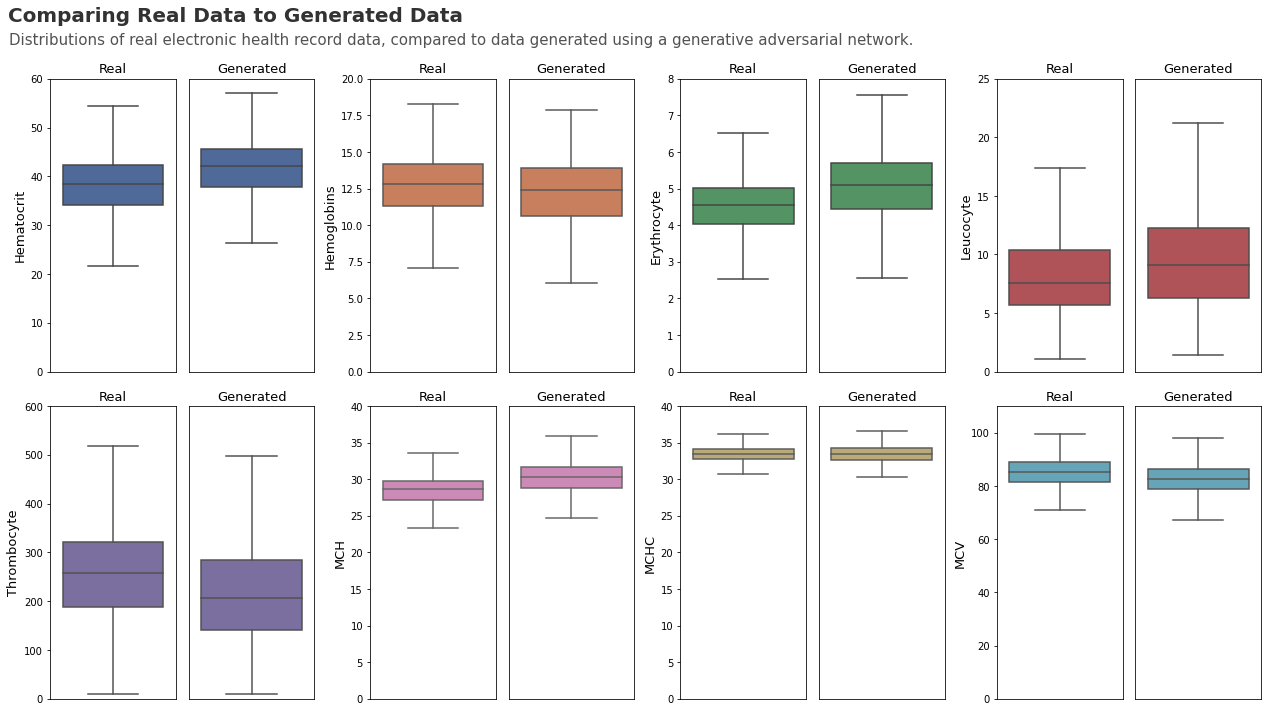

In [177]:
#Figure initialization
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 8)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059, 'Comparing Real Data to Generated Data', fontfamily='sans-serif',fontsize=20, fontweight='bold',color='#323232')
plt.figtext(0.004, 1.024, 'Distributions of real electronic health record data, compared to data generated using a generative adversarial network.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1A specifications
ax1A = ax.add_subplot(gs[0, 0])
plt.title('Real', size = 13, fontname = 'sans-serif')
sns.boxplot(y='Hematocrit', data=x_train_df, orient='v', color='#4367a5', width=0.8, showfliers = False)
ax1A.set_ylabel('Hematocrit', size = 13, fontname = 'sans-serif')
ax1A.set_xlabel('')
plt.ylim(0,60)
plt.xticks([]);

#Plot 1B specifications
ax1B = ax.add_subplot(gs[0, 1])
plt.title('Generated', size = 13, fontname = 'sans-serif')
sns.boxplot(y='Hematocrit', data=gen_x, orient='v', color='#4367a5', width=0.8, showfliers = False)
ax1B.set_ylabel('')
ax1B.set_xlabel('')
plt.ylim(0,60)
plt.yticks([]);
plt.xticks([]);

#Plot 2A specifications
ax2A = ax.add_subplot(gs[0, 2])
plt.title('Real', size = 13, fontname = 'sans-serif')
sns.boxplot(y='Hemoglobins', data=x_train_df, orient='v', color='#d9784c', width=0.8, showfliers = False)
ax2A.set_ylabel('Hemoglobins', size = 13, fontname = 'sans-serif')
ax2A.set_xlabel('')
plt.ylim(0,20)
plt.xticks([]);

#Plot 2B specifications
ax2B = ax.add_subplot(gs[0, 3])
plt.title('Generated', size = 13, fontname = 'sans-serif')
sns.boxplot(y='Hemoglobins', data=gen_x, orient='v', color='#d9784c', width=0.8, showfliers = False)
ax2B.set_ylabel('')
ax2B.set_xlabel('')
plt.ylim(0,20)
plt.yticks([]);
plt.xticks([]);

#Plot 3A specifications
ax3A = ax.add_subplot(gs[0, 4])
plt.title('Real', size = 13, fontname = 'sans-serif')
sns.boxplot(y='Erythrocyte', data=x_train_df, orient='v', color='#489e5f', width=0.8, showfliers = False)
ax3A.set_ylabel('Erythrocyte', size = 13, fontname = 'sans-serif')
ax3A.set_xlabel('')
plt.ylim(0,8)
plt.xticks([]);

#Plot 3B specifications
ax3B = ax.add_subplot(gs[0, 5])
plt.title('Generated', size = 13, fontname = 'sans-serif')
sns.boxplot(y='Erythrocyte', data=gen_x, orient='v', color='#489e5f', width=0.8, showfliers = False)
ax3B.set_ylabel('')
ax3B.set_xlabel('')
plt.ylim(0,8)
plt.yticks([]);
plt.xticks([]);

#Plot 4A specifications
ax4A = ax.add_subplot(gs[0, 6])
plt.title('Real', size = 13, fontname = 'sans-serif')
sns.boxplot(y='Leucocyte', data=x_train_df, orient='v', color='#be444a', width=0.8, showfliers = False)
ax4A.set_ylabel('Leucocyte', size = 13, fontname = 'sans-serif')
ax4A.set_xlabel('')
plt.ylim(0,25)
plt.xticks([]);

#Plot 4B specifications
ax4B = ax.add_subplot(gs[0, 7])
plt.title('Generated', size = 13, fontname = 'sans-serif')
sns.boxplot(y='Leucocyte', data=gen_x, orient='v', color='#be444a', width=0.8, showfliers = False)
ax4B.set_ylabel('')
ax4B.set_xlabel('')
plt.ylim(0,25)
plt.yticks([]);
plt.xticks([]);

#Plot 5A specifications
ax5A = ax.add_subplot(gs[1, 0])
plt.title('Real', size = 13, fontname = 'sans-serif')
sns.boxplot(y='Thrombocyte', data=x_train_df, orient='v', color='#7767a8', width=0.8, showfliers = False)
ax5A.set_ylabel('Thrombocyte', size = 13, fontname = 'sans-serif')
ax5A.set_xlabel('')
plt.ylim(0,600)
plt.xticks([]);

#Plot 5B specifications
ax5B = ax.add_subplot(gs[1, 1])
plt.title('Generated', size = 13, fontname = 'sans-serif')
sns.boxplot(y='Thrombocyte', data=gen_x, orient='v', color='#7767a8', width=0.8, showfliers = False)
ax5B.set_ylabel('')
ax5B.set_xlabel('')
plt.ylim(0,600)
plt.yticks([]);
plt.xticks([]);

#Plot 6A specifications
ax6A = ax.add_subplot(gs[1, 2])
plt.title('Real', size = 13, fontname = 'sans-serif')
sns.boxplot(y='MCH', data=x_train_df, orient='v', color='#d77fba', width=0.8, showfliers = False)
ax6A.set_ylabel('MCH', size = 13, fontname = 'sans-serif')
ax6A.set_xlabel('')
plt.ylim(0,40)
plt.xticks([]);

#Plot 6B specifications
ax6B = ax.add_subplot(gs[1, 3])
plt.title('Generated', size = 13, fontname = 'sans-serif')
sns.boxplot(y='MCH', data=gen_x, orient='v', color='#d77fba', width=0.8, showfliers = False)
ax6B.set_ylabel('')
ax6B.set_xlabel('')
plt.ylim(0,40)
plt.yticks([]);
plt.xticks([]);

#Plot 7A specifications
ax7A = ax.add_subplot(gs[1, 4])
plt.title('Real', size = 13, fontname = 'sans-serif')
sns.boxplot(y='MCHC', data=x_train_df, orient='v', color='#c5b06c', width=0.8, showfliers = False)
ax7A.set_ylabel('MCHC', size = 13, fontname = 'sans-serif')
ax7A.set_xlabel('')
plt.ylim(0,40)
plt.xticks([]);

#Plot 7B specifications
ax7B = ax.add_subplot(gs[1, 5])
plt.title('Generated', size = 13, fontname = 'sans-serif')
sns.boxplot(y='MCHC', data=gen_x, orient='v', color='#c5b06c', width=0.8, showfliers = False)
ax7B.set_ylabel('')
ax7B.set_xlabel('')
plt.ylim(0,40)
plt.yticks([]);
plt.xticks([]);

#Plot 8A specifications
ax8A = ax.add_subplot(gs[1, 6])
plt.title('Real', size = 13, fontname = 'sans-serif')
sns.boxplot(y='MCV', data=x_train_df, orient='v', color='#58acc5', width=0.8, showfliers = False)
ax8A.set_ylabel('MCV', size = 13, fontname = 'sans-serif')
ax8A.set_xlabel('')
plt.ylim(0,110)
plt.xticks([]);

#Plot 8B specifications
ax8B = ax.add_subplot(gs[1, 7])
plt.title('Generated', size = 13, fontname = 'sans-serif')
sns.boxplot(y='MCV', data=gen_x, orient='v', color='#58acc5', width=0.8, showfliers = False)
ax8B.set_ylabel('')
ax8B.set_xlabel('')
plt.ylim(0,110)
plt.yticks([]);
plt.xticks([]);

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Data Comparison.png' , bbox_inches="tight", dpi=600)

#Combined Data Prediction Models

In [159]:
#Converting Array to DataFrame
gen_y = pd.DataFrame(gen_y)

In [165]:
df_combined_train_x = x_train_df.append(gen_x).reset_index(drop=True)
df_combined_train_y = y_train_df.append(gen_y).reset_index(drop=True)

In [166]:
#Fitting Logistic Regression Classification Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(df_combined_train_x, df_combined_train_y.values.ravel())
pred = logreg.predict(x_test_df)
LR_Post = round(accuracy_score(y_test_df, pred),3)

In [ ]:
#Fitting Random Forest Classification Model
forest = RandomForestClassifier(random_state=8)
forest.fit(df_combined_train_x, df_combined_train_y)
pred = forest.predict(x_test_df)
RF_Post = round(accuracy_score(y_test_df, pred),3)

In [168]:
#Fitting Decision Tree Classification Model
dectree = DecisionTreeClassifier()
dectree.fit(df_combined_train_x, df_combined_train_y)
pred = dectree.predict(x_test_df)
DT_Post = round(accuracy_score(y_test_df, pred),3)

In [ ]:
#Fitting Gradient Boosting Classification Model
gradboo = GradientBoostingClassifier()
gradboo.fit(df_combined_train_x, df_combined_train_y)
pred = gradboo.predict(x_test_df)
GB_Post = round(accuracy_score(y_test_df, pred),3)

In [ ]:
#Fitting Neural Network Classification Model
neural = MLPClassifier()
neural.fit(df_combined_train_x, df_combined_train_y)
pred = neural.predict(x_test_df)
NN_Post = round(accuracy_score(y_test_df, pred),3)

# Comapring Models

In [178]:
#Summarizing Model Accuracies
Model_1_Pre = ['Logistic Regression', 'Real Data', LR_Pre]
Model_1_Post = ['Logistic Regression', 'Combined (Real & Generated)', LR_Post]
Model_2_Pre = ['Random Forest', 'Real Data', RF_Pre]
Model_2_Post = ['Random Forest', 'Combined (Real & Generated)', RF_Post]
Model_3_Pre = ['Decision Tree', 'Real Data', DT_Pre]
Model_3_Post = ['Decision Tree', 'Combined (Real & Generated)', DT_Post]
Model_4_Pre = ['Gradient Boosting', 'Real Data', GB_Pre]
Model_4_Post = ['Gradient Boosting', 'Combined (Real & Generated)', GB_Post]
Model_5_Pre = ['Neural Network', 'Real Data', NN_Pre]
Model_5_Post = ['Neural Network', 'Combined (Real & Generated)', NN_Post]

Models = [Model_1_Pre, Model_1_Post, Model_2_Pre, Model_2_Post, Model_3_Pre, Model_3_Post, Model_4_Pre, Model_4_Post, Model_5_Pre, Model_5_Post]

Model_Accuracy = pd.DataFrame(Models, columns=['Model', 'Data_Group', 'Accuracy'])

In [179]:
Model_Accuracy

,Model,Data_Group,Accuracy
0,Logistic Regression,Real Data,0.695
1,Logistic Regression,Combined (Real & Generated),0.668
2,Random Forest,Real Data,0.763
3,Random Forest,Combined (Real & Generated),0.772
4,Decision Tree,Real Data,0.656
5,Decision Tree,Combined (Real & Generated),0.661
6,Gradient Boosting,Real Data,0.742
7,Gradient Boosting,Combined (Real & Generated),0.740
8,Neural Network,Real Data,0.682
9,Neural Network,Combined (Real & Generated),0.720


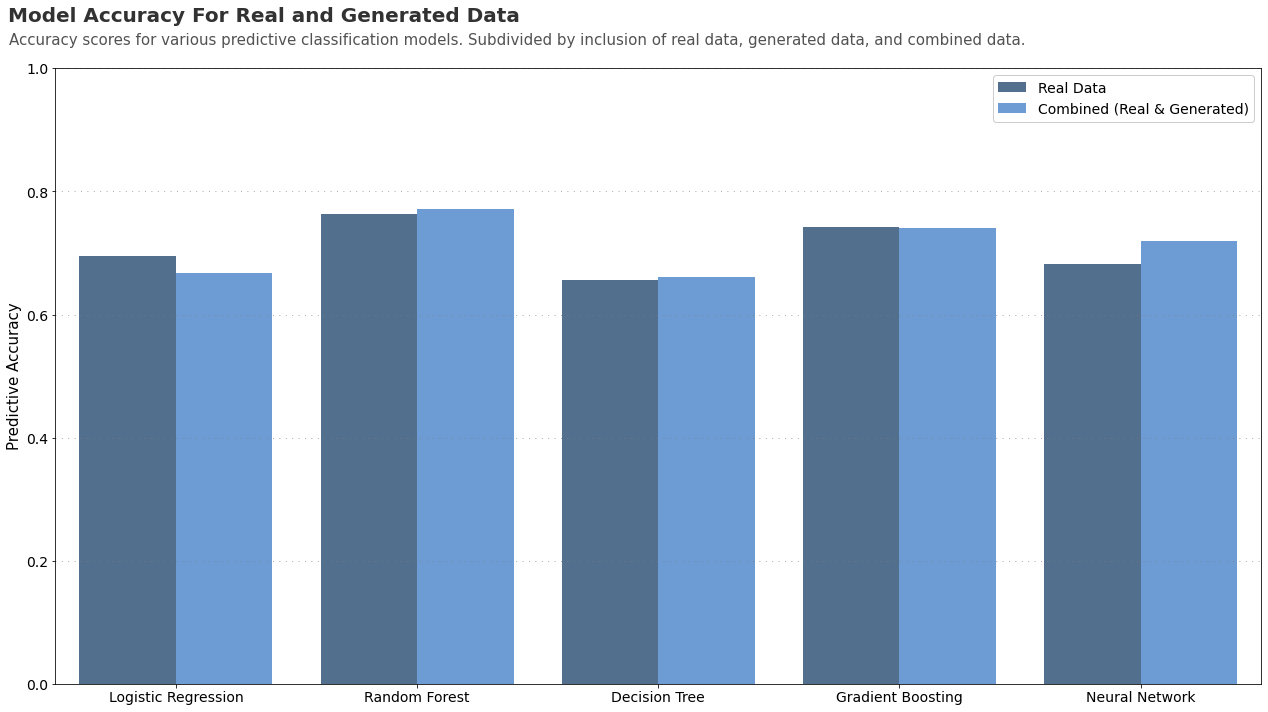

In [174]:
#Plot Letter Frequency
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)

#Figure annotations
plt.figtext(0.003, 1.059,'Model Accuracy For Real and Generated Data', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Accuracy scores for various predictive classification models. Subdivided by inclusion of real data, generated data, and combined data.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

palette ={'Real Data': '#496e98', 'Combined (Real & Generated)': '#5c99e4'}

#Figure specifications
ax1 = ax.add_subplot()
plt.title(f'', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=Model_Accuracy, x='Model', y='Accuracy', ax=ax1, hue='Data_Group', palette=palette, dodge=True)
plt.legend(loc="upper right", ncol=1, framealpha=1, fontsize=14)   
plt.xlabel(f'', fontsize = 13, fontfamily='sans-serif')
plt.ylabel('Predictive Accuracy', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
ax1.set_ylim(0, 1)

ax.savefig(f'{directory}/Model Accuracy.png' , bbox_inches="tight", dpi=600)